In [1]:
import _pickle as cPickle
import matplotlib.pyplot as plt
%matplotlib inline
results_dir = "/Users/meryemmhamdi/Desktop/Thesis/Backups/Rig5/CLDC_Results/"
from sklearn.metrics import confusion_matrix

# I. RCV Dataset:

## 1. Analysis of MLP Tuned Results:

In [68]:
print("Loading pseudo dict results ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/en,de,fr,it_fasttext_en_de_fr_it.vec_results.p", "rb") as file:
    results_multi_psdo = cPickle.load(file, encoding="latin1")

print("Loading expert dict results ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/en,de,fr,it_expert_dict_dim_red_en_de_fr_it.txt_results.p", "rb") as file:
    results_multi_expert = cPickle.load(file, encoding="latin1")
    
print("Loading sent alignment results ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/en,de,fr,it_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-500.p", "rb") as file:
    results_multi_sent_ali = cPickle.load(file, encoding="latin1")
    
#print("Loading sem results ...")
#with open(results_dir + "MLP-TUNED_KerasModels_RCV/en,de,fr,it_multi_embed_linear_projection_results.p", "rb") as file:
#    results_multi_joint = cPickle.load(file, encoding="latin1")

print("Loading english monolingual ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/english_fastext_mono_results.p", "rb") as file:
    results_en_mono_mlp = cPickle.load(file, encoding="latin1")

print("Loading german monolingual ...")   
with open(results_dir + "MLP-TUNED_KerasModels_RCV/german_fastext_mono_results.p", "rb") as file:
    results_de_mono_mlp = cPickle.load(file, encoding="latin1")

print("Loading french monolingual ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/french_mono_results.p", "rb") as file:
    results_fr_mono_mlp = cPickle.load(file, encoding="latin1")

print("Loading italian monolingual ...")
with open(results_dir + "MLP-TUNED_KerasModels_RCV/italian_mono_results.p", "rb") as file:
    results_it_mono_mlp = cPickle.load(file, encoding="latin1")

Loading pseudo dict results ...
Loading expert dict results ...
Loading sent alignment results ...
Loading english monolingual ...
Loading german monolingual ...
Loading french monolingual ...
Loading italian monolingual ...


In [135]:
with open(results_dir + "MLP-TUNED_KerasModels_RCV/en,de,fr,it_multiSkip_40_normalized_results.p", "rb") as file:
    results_multi_skip = cPickle.load(file, encoding="latin1")

In [137]:
results_multi_skip["test_metrics_fr"]

[{'acc': 0.9075792443025759,
  'f1_macro': 0.8360379483999603,
  'f1_micro': 0.9075792443025759,
  'precision_macro': 0.8444688716760097,
  'precision_micro': 0.9075792443025759,
  'recall_macro': 0.8287845777567514,
  'recall_micro': 0.9075792443025759},
 {'acc': 0.9126271249350456,
  'f1_macro': 0.8479968900023863,
  'f1_micro': 0.9126271249350456,
  'precision_macro': 0.8448935144214132,
  'precision_micro': 0.9126271249350456,
  'recall_macro': 0.8647355589491358,
  'recall_micro': 0.9126271249350456}]

## Confusion Matrix:

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
class_names = ["CCAT", "ECAT", "GCAT", "MCAT"]#label_dict = {'CCAT': 0, 'ECAT': 1, 'GCAT': 2, 'MCAT': 3}

Confusion matrix, without normalization
[[ 191   27   13   13]
 [  56 1650   92  122]
 [  15   50  330    7]
 [  44  195   30 1485]]


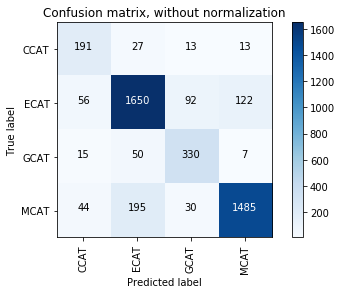

In [60]:
import numpy as np
import itertools
cnf_matrix = confusion_matrix(list(results_multi_expert['y_test_pred_it'][19]),list(results_multi_expert['y_test_trg_it'][19]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[1173  125  125  129]
 [  88  570   59   97]
 [  28   14  130    1]
 [  43   58    4 1374]]


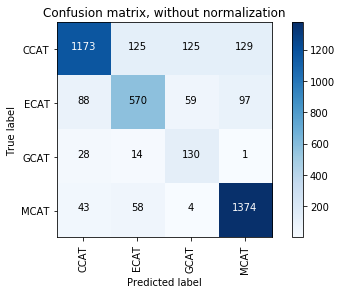

In [61]:
cnf_matrix = confusion_matrix(list(results_it_mono_mlp['y_test_pred_it'][19]),list(results_it_mono_mlp['y_test_trg_it'][19]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [59]:
results_fr_mono_mlp['y_test_trg_fr']

[array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2]),
 array([0, 2, 0, ..., 2, 2, 2])]

In [51]:
results_en_mono_mlp.keys()

dict_keys(['train_loss', 'y_dev_pred', 'train_metrics', 'test_metrics_en', 'y_dev_trg', 'y_test_pred_en', 'val_metrics', 'y_train_trg', 'y_test_trg_en', 'y_train_pred'])

## Learning Curves:

In [76]:
results_fr_mono_mlp["test_metrics_fr"]

[{'acc': 0.8311904401754652,
  'f1_macro': 0.6858890192837314,
  'f1_micro': 0.8311904401754652,
  'precision_macro': 0.870130014787147,
  'precision_micro': 0.8311904401754652,
  'recall_macro': 0.6340818073725969,
  'recall_micro': 0.8311904401754652},
 {'acc': 0.8502495840266223,
  'f1_macro': 0.7352765391755773,
  'f1_micro': 0.8502495840266223,
  'precision_macro': 0.8576759366494716,
  'precision_micro': 0.8502495840266223,
  'recall_macro': 0.680028102886276,
  'recall_micro': 0.8502495840266223},
 {'acc': 0.8659809408561489,
  'f1_macro': 0.7541200994517054,
  'f1_micro': 0.8659809408561489,
  'precision_macro': 0.8616446651037979,
  'precision_micro': 0.8659809408561489,
  'recall_macro': 0.7105610243263566,
  'recall_micro': 0.8659809408561489},
 {'acc': 0.8680986235062774,
  'f1_macro': 0.7811012531913051,
  'f1_micro': 0.8680986235062774,
  'precision_macro': 0.8693381228768073,
  'precision_micro': 0.8680986235062774,
  'recall_macro': 0.7295213555872215,
  'recall_micro':

In [69]:
f1_psdo_en = []
f1_psdo_de = []
f1_psdo_fr = []
f1_psdo_it = []

f1_exp_en = []
f1_exp_de = []
f1_exp_fr = []
f1_exp_it = []

f1_sent_ali_en = []
f1_sent_ali_de = []
f1_sent_ali_fr = []
f1_sent_ali_it = []

f1_mono_en = []
f1_mono_de = []
f1_mono_fr = []
f1_mono_it = []

for i in range(0,20):
    ### psdo
    precision_macro = results_multi_psdo["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_multi_psdo["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_en.append(f1)
    
    precision_macro = results_multi_psdo["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_multi_psdo["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_de.append(f1)
    
    precision_macro = results_multi_psdo["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_multi_psdo["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_fr.append(f1)
    
    precision_macro = results_multi_psdo["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_multi_psdo["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_it.append(f1)
    
    
    ### exp
    precision_macro = results_multi_expert["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_multi_expert["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_en.append(f1)
    
    precision_macro = results_multi_expert["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_multi_expert["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_de.append(f1)
    
    precision_macro = results_multi_expert["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_multi_expert["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_fr.append(f1)
    
    precision_macro = results_multi_expert["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_multi_expert["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_it.append(f1)
    
    ### sent_ali
    precision_macro = results_multi_sent_ali["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_multi_sent_ali["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_en.append(f1)
    
    precision_macro = results_multi_sent_ali["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_multi_sent_ali["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_de.append(f1)
    
    precision_macro = results_multi_sent_ali["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_multi_sent_ali["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_fr.append(f1)
    
    precision_macro = results_multi_sent_ali["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_multi_sent_ali["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_it.append(f1)
    
    ### mono
    precision_macro = results_en_mono_mlp["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_en_mono_mlp["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_en.append(f1)
    
    precision_macro = results_de_mono_mlp["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_de_mono_mlp["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_de.append(f1)
    
    precision_macro = results_fr_mono_mlp["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_fr_mono_mlp["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_fr.append(f1)
    
    precision_macro = results_it_mono_mlp["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_it_mono_mlp["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_it.append(f1)

In [75]:
f1_mono_fr

[0.7335849968699232,
 0.758590372523231,
 0.7788435316798852,
 0.7933164038580734,
 0.8011618653247826,
 0.7872625123743384,
 0.8004959381631477,
 0.8068223009429846,
 0.7979618927936667,
 0.8070348702780784,
 0.8159845972521717,
 0.8184115735349662,
 0.81917341873112,
 0.8247750337185341,
 0.8282267122281985,
 0.831309622911283,
 0.8271045826537791,
 0.8315572496864746,
 0.8345987101019924,
 0.823547902890078]

In [70]:
print(max(f1_mono_en))
print(max(f1_psdo_en))
print(max(f1_exp_en))
print(max(f1_sent_ali_en))

0.9257114706912731
0.9260691338379343
0.925559198932234
0.9246060645565412


In [71]:
print(max(f1_mono_de))
print(max(f1_psdo_de))
print(max(f1_exp_de))
print(max(f1_sent_ali_de))

0.8542865841121995
0.8527220347330461
0.8508254037520743
0.8520697255437999


In [73]:
print(max(f1_mono_it))
print(max(f1_psdo_it))
print(max(f1_exp_it))
print(max(f1_sent_ali_it))

0.7521606409189799
0.8290411236550769
0.8282622461538862
0.8151467274313031


In [74]:
print(max(f1_mono_fr))
print(max(f1_psdo_fr))
print(max(f1_exp_fr))
print(max(f1_sent_ali_fr))

0.8345987101019924
0.8926974292420919
0.8956956313660864
0.8917950171841645


Text(0.5,1,'F1 Score Evolution per epoch')

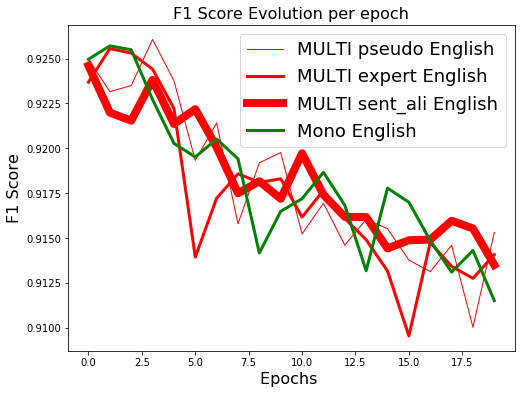

In [83]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_en,'r',linewidth=1.0)
plt.plot(f1_exp_en,'r',linewidth=3.0)
plt.plot(f1_sent_ali_en,'r',linewidth=8.0)
plt.plot(f1_mono_en,'g',linewidth=3.0)
plt.legend(['MULTI pseudo English', "MULTI expert English",  "MULTI sent_ali English", 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

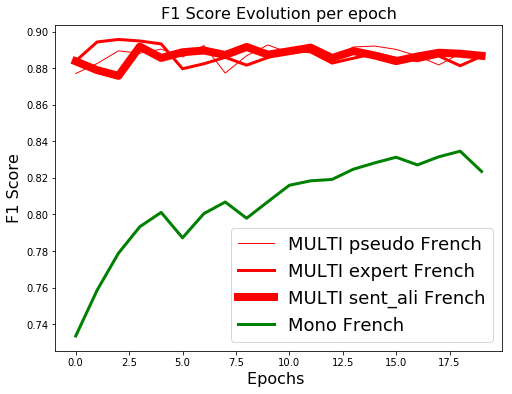

In [84]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_fr,'r',linewidth=1.0)
plt.plot(f1_exp_fr,'r',linewidth=3.0)
plt.plot(f1_sent_ali_fr,'r',linewidth=8.0)
plt.plot(f1_mono_fr,'g',linewidth=3.0)
plt.legend(['MULTI pseudo French', "MULTI expert French",  "MULTI sent_ali French", 'Mono French'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

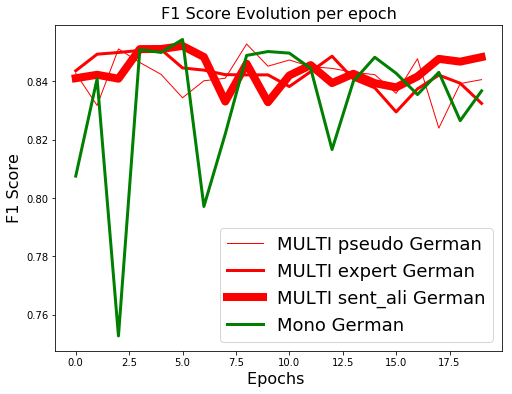

In [85]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_de,'r',linewidth=1.0)
plt.plot(f1_exp_de,'r',linewidth=3.0)
plt.plot(f1_sent_ali_de,'r',linewidth=8.0)
plt.plot(f1_mono_de,'g',linewidth=3.0)
plt.legend(['MULTI pseudo German', "MULTI expert German",  "MULTI sent_ali German", 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

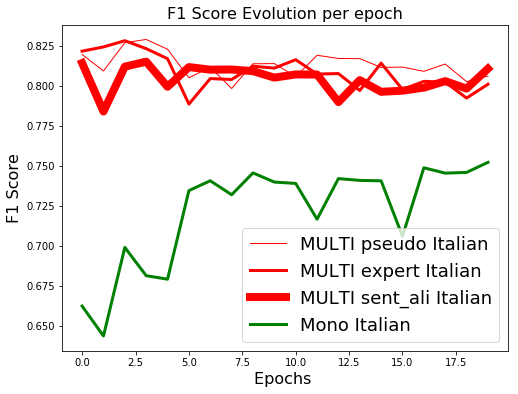

In [86]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_it,'r',linewidth=1.0)
plt.plot(f1_exp_it,'r',linewidth=3.0)
plt.plot(f1_sent_ali_it,'r',linewidth=8.0)
plt.plot(f1_mono_it,'g',linewidth=3.0)
plt.legend(['MULTI pseudo Italian', "MULTI expert Italian",  "MULTI sent_ali Italian", 'Mono Italian'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

In [5]:
dir_results_parent = results_dir + "MLP-TUNED_KerasModels_RCV/"

models_dir = ["english_fastext_mono_results.p", 
              "german_fastext_mono_results.p",
              "french_mono_results.p",
              "italian_mono_results.p",
              "en,de,fr,it_fasttext_en_de_fr_it.vec_results.p",
              "en,de,fr,it_expert_dict_dim_red_en_de_fr_it.txt_results.p",
              "en,de,fr,it_multiCCA_40_normalized_results.p",
              "en,de,fr,it_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-500.p",
              "en,de,fr,it_multiSkip_40_normalized_results.p"]

epoch = 12
metrics_list = []
all_lang = ["en", "de", "fr", "it"]
lang_dict = {"english": "en", "german": "de", "french":"fr", "italian":"it"}
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    print("Loading results= ", models_dir[i])
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:

            #print ("accuracy:", accuracy)

            
            #print ("macro f1 score:", f1_macro)
            precision_macro = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)

            recall_macro = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
            
            f1_macro = round(harm_mean_2(precision_macro, recall_macro),2) #round(results_dict['test_metrics_' + lang][epoch]["f1_macro"]*100,2)

        else:
            f1_macro, precision_macro, recall_macro = '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)


import numpy as np
import pandas as pd
table_values_arr = np.transpose(np.array(table_whole))

#print(table_values_arr)

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE',
                     'FR', 'FR', 'FR',
                     'IT', 'IT', 'IT'],
                    4*['Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'FR(mono)', 'IT(mono)', "multi(psdo_dict)", "multi(exp_dict)", 'multi(CCA)', 'multi(sent_ali)', "multi(skip_gram)" ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
df

EN(mono) DE(mono) FR(mono) IT(mono) multi(psdo_dict)  \
EN Macro f1           91.68        -        -        -            91.46   
   Macro Precision    91.62        -        -        -            91.21   
   Macro Recall       91.75        -        -        -            91.71   
DE Macro f1               -    81.66        -        -            84.44   
   Macro Precision        -    79.95        -        -            85.66   
   Macro Recall           -    83.44        -        -            83.25   
FR Macro f1               -        -    81.92        -            88.51   
   Macro Precision        -        -    88.44        -            89.54   
   Macro Recall           -        -    76.29        -             87.5   
IT Macro f1               -        -        -     74.2            81.71   
   Macro Precision        -        -        -    77.95            84.31   
   Macro Recall           -        -        -     70.8            79.27   

                   multi(exp_dict) multi(CCA) multi(sent_ali) multi(skip_gram)  
EN Macro f1                  91.61      91.48           91.61            91.49  
   Macro Precision           91.41      91.91           91.68             91.4  
   Macro Recall              91.81      91.05           91.55            91.58  
DE Macro f1                  84.86      83.07           83.94            83.96  
   Macro Precision           86.21      82.68           83.46            84.35  
   Macro Recall              83.55      83.46           84.42            83.57  
FR Macro f1                  88.28      88.34           88.55            88.52  
   Macro Precision            90.0      88.38           88.55            88.97  
   Macro Recall              86.62      88.31           88.56            88.07  
IT Macro f1                  80.77      81.53           78.99            80.76  
   Macro Precision           84.15      81.17           82.37            81.64  
   Macro Recall              77.65      81.89           75.87            79.89

In [6]:
df.T

EN                                    DE  \
                 Macro f1 Macro Precision Macro Recall Macro f1   
EN(mono)            91.68           91.62        91.75        -   
DE(mono)                -               -            -    81.66   
FR(mono)                -               -            -        -   
IT(mono)                -               -            -        -   
multi(psdo_dict)    91.46           91.21        91.71    84.44   
multi(exp_dict)     91.61           91.41        91.81    84.86   
multi(CCA)          91.48           91.91        91.05    83.07   
multi(sent_ali)     91.61           91.68        91.55    83.94   
multi(skip_gram)    91.49            91.4        91.58    83.96   

                                                    FR                  \
                 Macro Precision Macro Recall Macro f1 Macro Precision   
EN(mono)                       -            -        -               -   
DE(mono)                   79.95        83.44        -               -   
FR(mono)                       -            -    81.92           88.44   
IT(mono)                       -            -        -               -   
multi(psdo_dict)           85.66        83.25    88.51           89.54   
multi(exp_dict)            86.21        83.55    88.28            90.0   
multi(CCA)                 82.68        83.46    88.34           88.38   
multi(sent_ali)            83.46        84.42    88.55           88.55   
multi(skip_gram)           84.35        83.57    88.52           88.97   

                                    IT                               
                 Macro Recall Macro f1 Macro Precision Macro Recall  
EN(mono)                    -        -               -            -  
DE(mono)                    -        -               -            -  
FR(mono)                76.29        -               -            -  
IT(mono)                    -     74.2           77.95         70.8  
multi(psdo_dict)         87.5    81.71           84.31        79.27  
multi(exp_dict)         86.62    80.77           84.15        77.65  
multi(CCA)              88.31    81.53           81.17        81.89  
multi(sent_ali)         88.56    78.99           82.37        75.87  
multi(skip_gram)        88.07    80.76           81.64        79.89

## 2. Analysis of CNN Results:

In [91]:
print("Loading psedo_dict ...")
with open(results_dir + "CNN_KerasModels_RCV/en,de,fr,it_fasttext_en_de_fr_it.vec_results.p", "rb") as file:
    results_cnn_rcv_multi_psdo = cPickle.load(file, encoding="latin1")

    
print("Loading exp_dict ...")
with open(results_dir + "CNN_KerasModels_RCV/en,de,fr,it_expert_dict_dim_red_en_de_fr_it.txt_results.p", "rb") as file:
    results_cnn_rcv_multi_exp = cPickle.load(file, encoding="latin1")

print("Loading sem ...")
with open(results_dir + "CNN_KerasModels_RCV/en,de,fr,it_multi_embed_linear_projection_results.p", "rb") as file:
    results_cnn_rcv_multi_sem = cPickle.load(file, encoding="latin1")

print("Loading sent_ali ...")
with open(results_dir + "CNN_KerasModels_RCV/en,de,fr,it_multilingual_embeddings_joint_en_de_fr_it.txt_results.p", "rb") as file:
    results_cnn_rcv_multi_sent_ali = cPickle.load(file, encoding="latin1")

print("Loading cca ...")
with open(results_dir + "CNN_KerasModels_RCV/en,de,fr,it_multiCCA_512_normalized_results.p", "rb") as file:
    results_cnn_rcv_multi_cca = cPickle.load(file, encoding="latin1")

print("Loading english monolingual ...")
with open(results_dir + "CNN_KerasModels_RCV/english_fastext_mono_results.p", "rb") as file:
    results_en_cnn_rcv_mono = cPickle.load(file, encoding="latin1")

print("Loading german monolingual ...")   
with open(results_dir + "CNN_KerasModels_RCV/german_fastext_mono_results.p", "rb") as file:
    results_de_cnn_rcv_mono = cPickle.load(file, encoding="latin1")

print("Loading french monolingual ...")
with open(results_dir + "CNN_KerasModels_RCV/french_mono_results.p", "rb") as file:
    results_fr_cnn_rcv_mono = cPickle.load(file, encoding="latin1")

print("Loading italian monolingual ...")
with open(results_dir + "CNN_KerasModels_RCV/italian_mono_results.p", "rb") as file:
    results_it_cnn_rcv_mono = cPickle.load(file, encoding="latin1")

Loading psedo_dict ...
Loading exp_dict ...
Loading sem ...
Loading sent_ali ...
Loading cca ...
Loading english monolingual ...
Loading german monolingual ...
Loading french monolingual ...
Loading italian monolingual ...


In [94]:
f1_psdo_en = []
f1_psdo_de = []
f1_psdo_fr = []
f1_psdo_it = []

f1_exp_en = []
f1_exp_de = []
f1_exp_fr = []
f1_exp_it = []

f1_sem_en = []
f1_sem_de = []
f1_sem_fr = []
f1_sem_it = []

f1_sent_ali_en = []
f1_sent_ali_de = []
f1_sent_ali_fr = []
f1_sent_ali_it = []


f1_cca_en = []
f1_cca_de = []
f1_cca_fr = []
f1_cca_it = []

f1_mono_en = []
f1_mono_de = []
f1_mono_fr = []
f1_mono_it = []

for i in range(0,20):
    ### psdo
    precision_macro = results_cnn_rcv_multi_psdo["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_psdo["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_en.append(f1)
    
    precision_macro = results_cnn_rcv_multi_psdo["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_psdo["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_de.append(f1)
    
    precision_macro = results_cnn_rcv_multi_psdo["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_psdo["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_fr.append(f1)
    
    precision_macro = results_cnn_rcv_multi_psdo["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_psdo["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_psdo_it.append(f1)
    
    
    ### exp
    precision_macro = results_cnn_rcv_multi_exp["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_exp["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_en.append(f1)
    
    precision_macro = results_cnn_rcv_multi_exp["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_exp["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_de.append(f1)
    
    precision_macro = results_cnn_rcv_multi_exp["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_exp["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_fr.append(f1)
    
    precision_macro = results_cnn_rcv_multi_exp["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_exp["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_exp_it.append(f1)
    
    
    ### sem
    precision_macro = results_cnn_rcv_multi_sem["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sem["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sem_en.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sem["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sem["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sem_de.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sem["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sem["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sem_fr.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sem["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sem["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sem_it.append(f1)
    
    ### sent_ali
    precision_macro = results_cnn_rcv_multi_sent_ali["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sent_ali["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_en.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sent_ali["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sent_ali["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_de.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sent_ali["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sent_ali["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_fr.append(f1)
    
    precision_macro = results_cnn_rcv_multi_sent_ali["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sent_ali["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_sent_ali_it.append(f1)
    
    
    ### cca
    precision_macro = results_cnn_rcv_multi_cca["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_cca["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_cca_en.append(f1)
    
    precision_macro = results_cnn_rcv_multi_cca["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_cca["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_cca_de.append(f1)
    
    precision_macro = results_cnn_rcv_multi_cca["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_cca["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_cca_fr.append(f1)
    
    precision_macro = results_cnn_rcv_multi_cca["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_cnn_rcv_multi_sent_ali["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_cca_it.append(f1)
    
    ### mono
    precision_macro = results_en_cnn_rcv_mono["test_metrics_en"][i]["precision_macro"]
    recall_macro = results_en_cnn_rcv_mono["test_metrics_en"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_en.append(f1)
    
    precision_macro = results_de_cnn_rcv_mono["test_metrics_de"][i]["precision_macro"]
    recall_macro = results_de_cnn_rcv_mono["test_metrics_de"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_de.append(f1)
    
    precision_macro = results_fr_cnn_rcv_mono["test_metrics_fr"][i]["precision_macro"]
    recall_macro = results_fr_cnn_rcv_mono["test_metrics_fr"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_fr.append(f1)
    
    precision_macro = results_it_cnn_rcv_mono["test_metrics_it"][i]["precision_macro"]
    recall_macro = results_it_cnn_rcv_mono["test_metrics_it"][i]["recall_macro"]
    f1 = harm_mean_2(precision_macro, recall_macro)
    f1_mono_it.append(f1)

Text(0.5,1,'F1 Score Evolution per epoch')

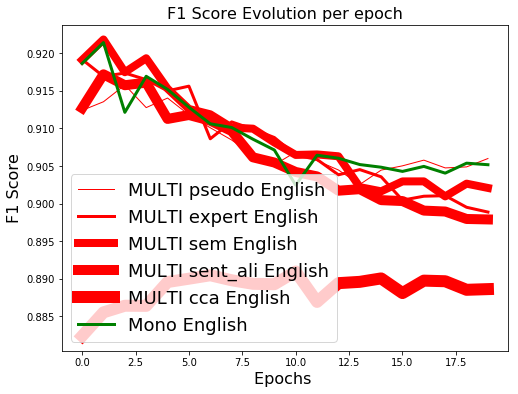

In [95]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_en,'r',linewidth=1.0)
plt.plot(f1_exp_en,'r',linewidth=3.0)
plt.plot(f1_sem_en,'r',linewidth=8.0)
plt.plot(f1_sent_ali_en,'r',linewidth=10.0)
plt.plot(f1_cca_en,'r',linewidth=12.0)
plt.plot(f1_mono_en,'g',linewidth=3.0)
plt.legend(['MULTI pseudo English', "MULTI expert English", "MULTI sem English", "MULTI sent_ali English", "MULTI cca English", 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

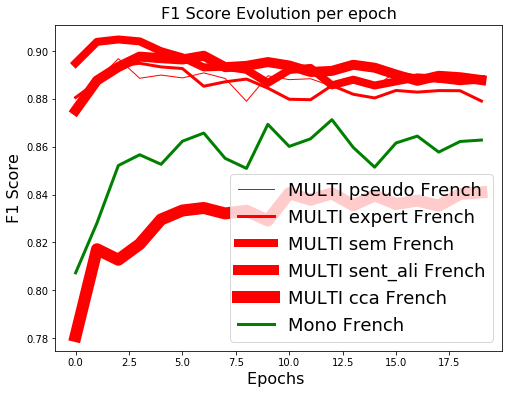

In [96]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_fr,'r',linewidth=1.0)
plt.plot(f1_exp_fr,'r',linewidth=3.0)
plt.plot(f1_sem_fr,'r',linewidth=8.0)
plt.plot(f1_sent_ali_fr,'r',linewidth=10.0)
plt.plot(f1_cca_fr,'r',linewidth=12.0)
plt.plot(f1_mono_fr,'g',linewidth=3.0)
plt.legend(['MULTI pseudo French', "MULTI expert French", "MULTI sem French", "MULTI sent_ali French", "MULTI cca French", 'Mono French'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

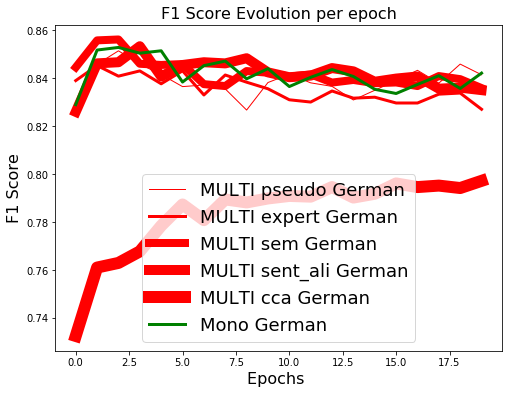

In [97]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_de,'r',linewidth=1.0)
plt.plot(f1_exp_de,'r',linewidth=3.0)
plt.plot(f1_sem_de,'r',linewidth=8.0)
plt.plot(f1_sent_ali_de,'r',linewidth=10.0)
plt.plot(f1_cca_de,'r',linewidth=12.0)
plt.plot(f1_mono_de,'g',linewidth=3.0)
plt.legend(['MULTI pseudo German', "MULTI expert German", "MULTI sem German", "MULTI sent_ali German", "MULTI cca German", 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

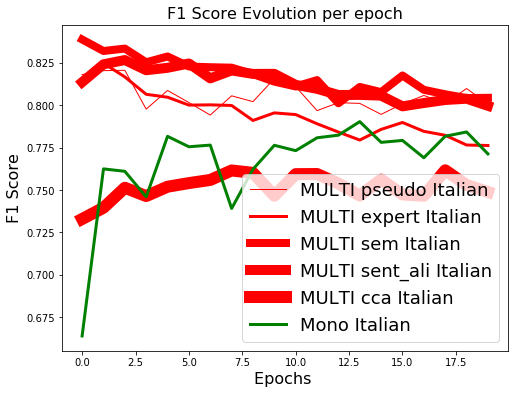

In [98]:
plt.figure(figsize=[8,6])
plt.plot(f1_psdo_it,'r',linewidth=1.0)
plt.plot(f1_exp_it,'r',linewidth=3.0)
plt.plot(f1_sem_it,'r',linewidth=8.0)
plt.plot(f1_sent_ali_it,'r',linewidth=10.0)
plt.plot(f1_cca_it,'r',linewidth=12.0)
plt.plot(f1_mono_it,'g',linewidth=3.0)
plt.legend(['MULTI pseudo Italian', "MULTI expert Italian", "MULTI sem Italian", "MULTI sent_ali Italian", "MULTI cca Italian", 'Mono Italian'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

In [17]:
dir_results_parent = results_dir + "CNN_KerasModels_RCV/"

models_dir = ["english_fastext_mono_results.p", 
              "german_fastext_mono_results.p",
              "french_mono_results.p",
              "italian_mono_results.p",
              "en,de,fr,it_fasttext_en_de_fr_it.vec_results.p",
              "en,de,fr,it_expert_dict_dim_red_en_de_fr_it.txt_results.p",
              "en,de,fr,it_multiCCA_40_normalized_results.p",
              "en,de,fr,it_multi_embed_linear_projection_results.p",
              "en,de,fr,it_multilingual_embeddings_joint_en_de_fr_it.txt_results.p",
              "en,de,fr,it_multiSkip_40_normalized_results.p"]

epoch = 17
metrics_list = []
all_lang = ["en", "de", "fr", "it"]
lang_dict = {"english": "en", "german": "de", "french":"fr", "italian":"it"}
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    print("Loading results= ", models_dir[i])
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            #print ("accuracy:", accuracy)

            #print ("macro f1 score:", f1_macro)
            if i == 4 and lang == "en":
                for ep in range(0,20):
                    print("ep:", ep, "precision:", round(results_dict['test_metrics_' + lang][ep]["precision_macro"]*100,2), "recall:", "precision:", round(results_dict['test_metrics_' + lang][ep]["recall_macro"]*100,2))
            precision_macro = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)

            recall_macro = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
            
            f1_macro = round(harm_mean_2(precision_macro, recall_macro),2)
        else:
            f1_macro, precision_macro, recall_macro = '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

#print(table_values_arr)

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE',
                     'FR', 'FR', 'FR',
                     'IT', 'IT', 'IT'],
                    4*['Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'FR(mono)', 'IT(mono)', 'multi(psedo)', 'multi(exp)', "multi(cca)", 'multi(sem)', "multi(sent_ali)", "multi(skip_gram)" ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
df

Loading results=  english_fastext_mono_results.p
Loading results=  german_fastext_mono_results.p
Loading results=  french_mono_results.p
Loading results=  italian_mono_results.p
Loading results=  en,de,fr,it_fasttext_en_de_fr_it.vec_results.p
ep: 0 precision: 92.23 recall: precision: 90.27
ep: 1 precision: 90.15 recall: precision: 92.59
ep: 2 precision: 91.7 recall: precision: 91.45
ep: 3 precision: 91.13 recall: precision: 91.42
ep: 4 precision: 91.82 recall: precision: 90.99
ep: 5 precision: 91.56 recall: precision: 90.8
ep: 6 precision: 90.85 recall: precision: 91.17
ep: 7 precision: 91.3 recall: precision: 90.39
ep: 8 precision: 90.88 recall: precision: 90.41
ep: 9 precision: 90.8 recall: precision: 90.23
ep: 10 precision: 90.64 recall: precision: 90.73
ep: 11 precision: 90.69 recall: precision: 90.45
ep: 12 precision: 90.4 recall: precision: 90.49
ep: 13 precision: 90.6 recall: precision: 89.91
ep: 14 precision: 90.61 recall: precision: 90.28
ep: 15 precision: 90.75 recall: precis

EN(mono) DE(mono) FR(mono) IT(mono) multi(psedo)  \
EN Macro f1           90.41        -        -        -        90.47   
   Macro Precision    91.24        -        -        -        90.42   
   Macro Recall       89.59        -        -        -        90.52   
DE Macro f1               -    84.11        -        -         83.8   
   Macro Precision        -    85.88        -        -        84.64   
   Macro Recall           -    82.42        -        -        82.97   
FR Macro f1               -        -    85.78        -        88.69   
   Macro Precision        -        -    88.55        -        88.72   
   Macro Recall           -        -    83.17        -        88.66   
IT Macro f1               -        -        -    78.17        80.11   
   Macro Precision        -        -        -    81.06        83.41   
   Macro Recall           -        -        -    75.47        77.07   

                   multi(exp) multi(cca) multi(sem) multi(sent_ali)  \
EN Macro f1              90.1       90.8      90.09           89.89   
   Macro Precision      90.11      90.88      89.71           90.24   
   Macro Recall          90.1      90.72      90.48           89.55   
DE Macro f1             83.34      84.46       84.1           83.57   
   Macro Precision      84.19       85.5      85.33           84.09   
   Macro Recall          82.5      83.45       82.9           83.06   
FR Macro f1             88.35      89.47      88.84           88.97   
   Macro Precision      88.75      90.76      89.92           89.57   
   Macro Recall         87.95      88.21      87.79           88.38   
IT Macro f1             78.22      81.78      80.64            80.3   
   Macro Precision      81.23      84.67      83.64            81.2   
   Macro Recall         75.43      79.09      77.85           79.42   

                   multi(skip_gram)  
EN Macro f1                    90.8  
   Macro Precision            90.88  
   Macro Recall               90.72  
DE Macro f1                   84.46  
   Macro Precision             85.5  
   Macro Recall               83.45  
FR Macro f1                   89.47  
   Macro Precision            90.76  
   Macro Recall               88.21  
IT Macro f1                   81.78  
   Macro Precision            84.67  
   Macro Recall               79.09

In [18]:
df.T

EN                                    DE  \
                 Macro f1 Macro Precision Macro Recall Macro f1   
EN(mono)            90.41           91.24        89.59        -   
DE(mono)                -               -            -    84.11   
FR(mono)                -               -            -        -   
IT(mono)                -               -            -        -   
multi(psedo)        90.47           90.42        90.52     83.8   
multi(exp)           90.1           90.11         90.1    83.34   
multi(cca)           90.8           90.88        90.72    84.46   
multi(sem)          90.09           89.71        90.48     84.1   
multi(sent_ali)     89.89           90.24        89.55    83.57   
multi(skip_gram)     90.8           90.88        90.72    84.46   

                                                    FR                  \
                 Macro Precision Macro Recall Macro f1 Macro Precision   
EN(mono)                       -            -        -               -   
DE(mono)                   85.88        82.42        -               -   
FR(mono)                       -            -    85.78           88.55   
IT(mono)                       -            -        -               -   
multi(psedo)               84.64        82.97    88.69           88.72   
multi(exp)                 84.19         82.5    88.35           88.75   
multi(cca)                  85.5        83.45    89.47           90.76   
multi(sem)                 85.33         82.9    88.84           89.92   
multi(sent_ali)            84.09        83.06    88.97           89.57   
multi(skip_gram)            85.5        83.45    89.47           90.76   

                                    IT                               
                 Macro Recall Macro f1 Macro Precision Macro Recall  
EN(mono)                    -        -               -            -  
DE(mono)                    -        -               -            -  
FR(mono)                83.17        -               -            -  
IT(mono)                    -    78.17           81.06        75.47  
multi(psedo)            88.66    80.11           83.41        77.07  
multi(exp)              87.95    78.22           81.23        75.43  
multi(cca)              88.21    81.78           84.67        79.09  
multi(sem)              87.79    80.64           83.64        77.85  
multi(sent_ali)         88.38     80.3            81.2        79.42  
multi(skip_gram)        88.21    81.78           84.67        79.09

In [108]:
df.columns = [ 'EN(mono)', 'DE(mono)', 'FR(mono)', 'IT(mono)', 'multi_Skip', 'multi_CCA', 'multi(Joint)' ]
df

EN(mono) DE(mono) FR(mono) IT(mono) multi_Skip multi_CCA  \
EN Accuracy           87.79        -        -        -       84.4     91.19   
   Macro Precision    86.45        -        -        -      82.59     89.67   
   Macro Recall       84.16        -        -        -      79.47     88.35   
   Macro f1           85.19        -        -        -      80.81     88.93   
DE Accuracy               -     84.7        -        -      80.65     85.88   
   Macro Precision        -    80.49        -        -      72.06      80.1   
   Macro Recall           -    74.31        -        -      70.78     78.29   
   Macro f1               -    75.97        -        -      71.32     79.11   
FR Accuracy               -        -    91.05        -      84.86     90.05   
   Macro Precision        -        -    87.34        -      75.54     84.72   
   Macro Recall           -        -    83.06        -      74.39     83.23   
   Macro f1               -        -    84.56        -       74.9     83.95   
IT Accuracy               -        -        -    84.07      72.48     79.75   
   Macro Precision        -        -        -    80.45      63.85     71.97   
   Macro Recall           -        -        -    75.33      58.93     67.94   
   Macro f1               -        -        -    76.24      60.81     69.63   

                   multi(Joint)  
EN Accuracy               83.45  
   Macro Precision         81.7  
   Macro Recall           77.77  
   Macro f1               79.13  
DE Accuracy               76.23  
   Macro Precision        64.52  
   Macro Recall           61.01  
   Macro f1               61.15  
FR Accuracy                79.3  
   Macro Precision         63.1  
   Macro Recall           56.84  
   Macro f1               58.82  
IT Accuracy               66.21  
   Macro Precision        57.92  
   Macro Recall           49.57  
   Macro f1               51.05

# II. Churn Dataset:

## 1. Analysis of MLP Tuned Results:

In [103]:
print("Loading multilingual results ...")
dir_ = "MLP-TUNED_KerasModels_CHURN/"

print("Loading multilingual semantic specialization ...")
with open(results_dir + dir_+ "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p", "rb") as file:
    results_multi_mlp_sem = cPickle.load(file, encoding="latin1")

print("Loading multilingual sent_ali embeddings ...")
with open(results_dir + dir_ + "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p", "rb") as file:
    results_multi_mlp_sent_ali = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual cca embeddings ...")
with open(results_dir + dir_ + "en,de_multiCCA_512_normalized_results.p", "rb") as file:
    results_multi_mlp_multi_CCA = cPickle.load(file, encoding="latin1")

print("Loading multilingual pseudo ...")
with open(results_dir + dir_ + "en,de_fasttext_en_de_fr_it.vec_results.p", "rb") as file:
    results_multi_mlp_psdo = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual expert ...")
with open(results_dir + dir_ + "en,de_expert_dict_dim_red_de_en.txt_results.p", "rb") as file:
    results_multi_mlp_expert = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual skipgram ...")
with open(results_dir + dir_ + "en,de_multiSkip_512_normalized_results.p", "rb") as file:
    results_multi_mlp_skipgram = cPickle.load(file, encoding="latin1")
    
   
"""
sup_dir = "/Users/meryemmhamdi/Documents/CLDC_Results/CLDC_Results/MLP-TUNED_KerasModels_CHURN/"
print("Loading multilingual unsupervised ...")
with open(sup_dir+ "en,de_supervised_fastext.txt_results.p", "rb") as file:
    sup_multi = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual unsupervised ...")
with open(sup_dir+ "en,de_unsupervised_fastext.txt_results.p", "rb") as file:
    unsup_multi = cPickle.load(file, encoding="latin1")
"""
    
print("Loading english monolingual ...")
with open(results_dir + dir_ + "english_mono_results.p", "rb") as file:
    results_en_mono_mlp = cPickle.load(file, encoding="latin1")

print("Loading german monolingual ...")   
with open(results_dir + dir_ + "/german_mono_results.p", "rb") as file:
    results_de_mono_mlp = cPickle.load(file, encoding="latin1")

Loading multilingual results ...
Loading multilingual semantic specialization ...
Loading multilingual sent_ali embeddings ...
Loading multilingual cca embeddings ...
Loading multilingual pseudo ...
Loading multilingual expert ...
Loading multilingual skipgram ...
Loading english monolingual ...
Loading german monolingual ...


In [104]:
f1_multi_sem_en = []
f1_multi_sem_de = []

f1_multi_sent_ali_en = []
f1_multi_sent_ali_de = []

f1_multi_CCA_en = []
f1_multi_CCA_de = []

f1_multi_psdo_en = []
f1_multi_psdo_de = []

f1_multi_exp_en = []
f1_multi_exp_de = []


f1_multi_skip_en = []
f1_multi_skip_de = []

f1_mono_en = []
f1_mono_de = []


for i in range(0,20):
    f1_multi_sem_en.append(results_multi_mlp_sem["test_metrics_en"][i]["f1_macro"])
    f1_multi_sem_de.append(results_multi_mlp_sem["test_metrics_de"][i]["f1_macro"])
    
    f1_multi_sent_ali_en.append(results_multi_mlp_sent_ali["test_metrics_en"][i]["f1_macro"])
    f1_multi_sent_ali_de.append(results_multi_mlp_sent_ali["test_metrics_de"][i]["f1_macro"])

    f1_multi_CCA_en.append(results_multi_mlp_multi_CCA["test_metrics_en"][i]["f1_macro"])
    f1_multi_CCA_de.append(results_multi_mlp_multi_CCA["test_metrics_de"][i]["f1_macro"])
    
    f1_multi_psdo_en.append(results_multi_mlp_psdo["test_metrics_en"][i]["f1_macro"])
    f1_multi_psdo_de.append(results_multi_mlp_psdo["test_metrics_de"][i]["f1_macro"])
    
    f1_multi_exp_en.append(results_multi_mlp_expert["test_metrics_en"][i]["f1_macro"])
    f1_multi_exp_de.append(results_multi_mlp_expert["test_metrics_de"][i]["f1_macro"])
    
    f1_multi_skip_en.append(results_multi_mlp_skipgram["test_metrics_en"][i]["f1_macro"])
    f1_multi_skip_de.append(results_multi_mlp_skipgram["test_metrics_de"][i]["f1_macro"])
    
    f1_mono_en.append(results_en_mono_mlp["test_metrics_en"][i]["f1_macro"])
    f1_mono_de.append(results_de_mono_mlp["test_metrics_de"][i]["f1_macro"])
    

In [105]:
print(max(f1_mono_en))
print(max(f1_multi_sem_en))
print(max(f1_multi_sent_ali_en))
print(max(f1_multi_CCA_en))
print(max(f1_multi_psdo_en))
print(max(f1_multi_exp_en))
print(max(f1_multi_skip_en))

0.7141102376273003
0.7085045560121492
0.7017307360579594
0.7088433712872797
0.7168640721940214
0.7102062807881774
0.7072110286320255


In [106]:
print(max(f1_mono_de))
print(max(f1_multi_sem_de))
print(max(f1_multi_sent_ali_de))
print(max(f1_multi_CCA_de))
print(max(f1_multi_psdo_de))
print(max(f1_multi_exp_de))
print(max(f1_multi_skip_de))

0.6507331411971387
0.6379585326953747
0.656755217233701
0.6493456339841236
0.6411866199142873
0.6229385010876014
0.6285433172803065


Text(0.5,1,'F1 Score Evolution per epoch')

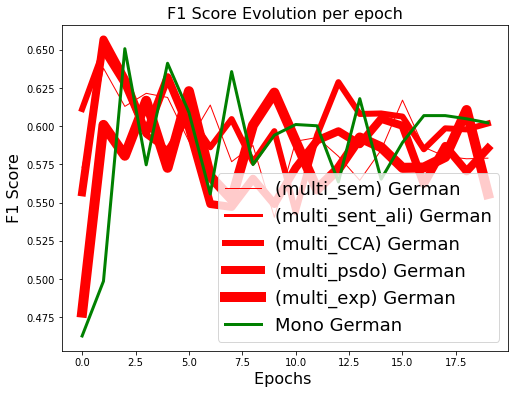

In [40]:
plt.figure(figsize=[8,6])
plt.plot(f1_multi_sem_de,'r',linewidth=1.0)
plt.plot(f1_multi_sent_ali_de,'r',linewidth=3.0)
plt.plot(f1_multi_CCA_de,'r',linewidth=6.0)
plt.plot(f1_multi_sent_ali_de,'r',linewidth=8.0)
plt.plot(f1_multi_exp_de,'r',linewidth=10.0)
plt.plot(f1_mono_de,'g',linewidth=3.0)
plt.legend(['(multi_sem) German', '(multi_sent_ali) German', '(multi_CCA) German', '(multi_psdo) German', '(multi_exp) German', 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

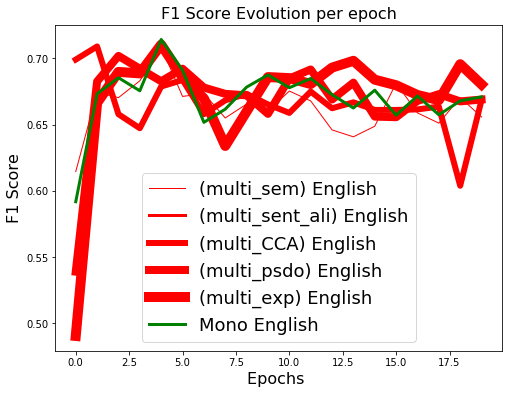

In [41]:
plt.figure(figsize=[8,6])
plt.plot(f1_multi_sem_en,'r',linewidth=1.0)
plt.plot(f1_multi_sent_ali_en,'r',linewidth=3.0)
plt.plot(f1_multi_CCA_en,'r',linewidth=6.0)
plt.plot(f1_multi_sent_ali_en,'r',linewidth=8.0)
plt.plot(f1_multi_exp_en,'r',linewidth=10.0)
plt.plot(f1_mono_en,'g',linewidth=3.0)
plt.legend(['(multi_sem) English', '(multi_sent_ali) English', '(multi_CCA) English', '(multi_psdo) English', '(multi_exp) English', 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

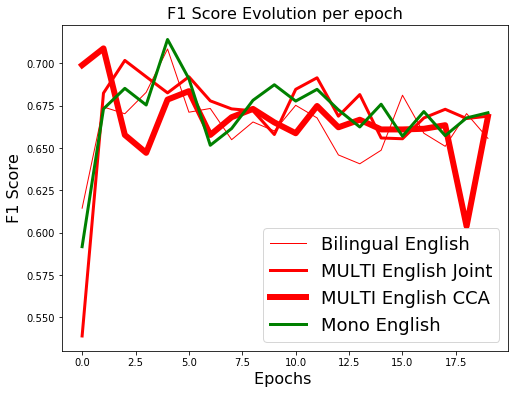

In [18]:
plt.figure(figsize=[8,6])
plt.plot(f1_multi_bil_en,'r',linewidth=1.0)
plt.plot(f1_multi_joint_en,'r',linewidth=3.0)
plt.plot(f1_multi_CCA_en,'r',linewidth=6.0)
plt.plot(f1_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'Accuracy Evolution per epoch')

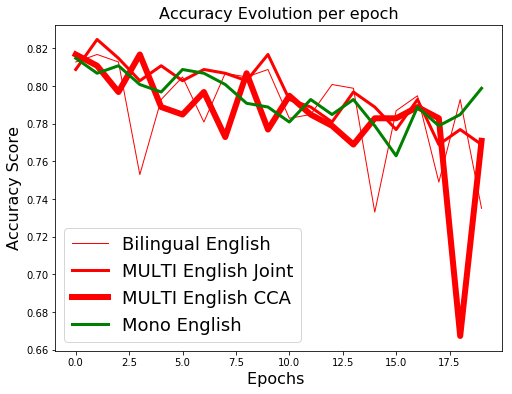

In [19]:
plt.figure(figsize=[8,6])
plt.plot(acc_multi_bil_en,'r',linewidth=1.0)
plt.plot(acc_multi_joint_en,'r',linewidth=3.0)
plt.plot(acc_multi_CCA_en,'r',linewidth=6.0)
plt.plot(acc_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Accuracy Evolution per epoch',fontsize=16)

In [11]:
import pandas as pd
import numpy as np

In [113]:
dir_results_parent = results_dir + "MLP-TUNED_KerasModels_CHURN/"
models_dir = ["english_fastext_mono_results.p", 
              "german_fastext_mono_results.p",
              "en,de_fasttext_en_de_fr_it.vec_results.p",
              "en,de_expert_dict_dim_red_de_en.txt_results.p",
              "en,de_multiCCA_512_normalized_results.p",
              "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p",
              "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p",
              "en,de_multiSkip_512_normalized_results.p"]

epoch = 1
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            #f1_macro = round(results_dict['test_metrics_' + lang][epoch]["f1_macro"]*100,2)
            precision_macro = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)

            recall_macro = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
            f1_macro = round(harm_mean_2(precision_macro, recall_macro),2)
        else:
            f1_macro, precision_macro, recall_macro = '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*[ 'Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1           68.04        -         71.84      67.13       70.9   
   Macro Precision    70.05        -         70.68      69.23      70.52   
   Macro Recall       66.15        -         73.03      65.15      71.28   
DE Macro f1               -    55.46         64.08      62.13      65.02   
   Macro Precision        -    59.93         65.38      66.53       65.9   
   Macro Recall           -    51.61         62.83      58.27      64.16   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1             68.12            69.2       70.91  
   Macro Precision       70.8           72.55       72.35  
   Macro Recall         65.64           66.14       69.52  
DE Macro f1             64.16           65.69       63.21  
   Macro Precision      65.99           66.01        66.6  
   Macro Recall         62.42           65.37       60.14

In [112]:
epochs = range(20)
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
f1_mono_en_mono = []
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent + models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            precision_macro_list = []
            recall_macro_list = []
            f1_macro_list = []
            for epoch in epochs:
                prec = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)
                rec = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
                precision_macro_list.append(prec)
                recall_macro_list.append(rec)
                f1_macro_list.append(round(harm_mean_2(prec, rec),2))
            ind = f1_macro_list.index(max(f1_macro_list))
            f1_macro = f1_macro_list[ind]
            recall_macro = recall_macro_list[ind]
            precision_macro = precision_macro_list[ind]

        else:
            f1_macro, precision_macro, recall_macro =  '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*['Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)

df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1           71.94        -         71.94      71.06       70.9   
   Macro Precision    70.41        -         70.41      71.74      70.52   
   Macro Recall       73.54        -         73.54       70.4      71.28   
DE Macro f1               -    63.68         64.35      62.36      65.02   
   Macro Precision        -    66.84          65.8      61.42       65.9   
   Macro Recall           -    60.81         62.96      63.32      64.16   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1              71.4           70.21       70.91  
   Macro Precision      69.38           70.77       72.35  
   Macro Recall         73.54           69.65       69.52  
DE Macro f1             64.16           65.69       63.21  
   Macro Precision      65.99           66.01        66.6  
   Macro Recall         62.42           65.37       60.14

## 2. Analysis of CNN Results:

In [78]:
print("Loading multilingual results ...")
dir_ = "CNN_KerasModels_CHURN/"

print("Loading multilingual semantic specialization ...")
with open(results_dir + dir_+ "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p", "rb") as file:
    results_multi_cnn_bil = cPickle.load(file, encoding="latin1")

print("Loading multilingual joint embeddings ...")
with open(results_dir + dir_ + "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p", "rb") as file:
    results_multi_cnn_joint = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual CCA embeddings ...")
with open(results_dir + dir_ + "en,de_multiCCA_512_normalized_results.p", "rb") as file:
    results_multi_cnn_multi_CCA = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual fastext embeddings ...")
with open(results_dir + dir_ + "en,de_fasttext_en_de_fr_it.vec_results.p", "rb") as file:
    results_multi_cnn_multi_fastext = cPickle.load(file, encoding="latin1")

print("Loading english monolingual ...")
with open(results_dir + dir_ + "english_fastext_mono_results.p", "rb") as file:
    results_en_mono_cnn = cPickle.load(file, encoding="latin1")

print("Loading german monolingual ...")   
with open(results_dir + dir_ + "german_fastext_mono_results.p", "rb") as file:
    results_de_mono_cnn = cPickle.load(file, encoding="latin1")

Loading multilingual results ...
Loading multilingual semantic specialization ...
Loading multilingual joint embeddings ...
Loading multilingual CCA embeddings ...
Loading multilingual joint embeddings ...
Loading english monolingual ...
Loading german monolingual ...


In [80]:
f1_cnn_multi_bil_en = []
f1_cnn_multi_bil_de = []

f1_cnn_multi_joint_en = []
f1_cnn_multi_joint_de = []

f1_cnn_multi_CCA_en = []
f1_cnn_multi_CCA_de = []

f1_cnn_multi_fastext_en = []
f1_cnn_multi_fastext_de = []

f1_cnn_mono_en = []
f1_cnn_mono_de = []

acc_cnn_multi_bil_en = []
acc_cnn_multi_bil_de = []

acc_cnn_multi_joint_en = []
acc_cnn_multi_joint_de = []

acc_cnn_multi_CCA_en = []
acc_cnn_multi_CCA_de = []

acc_cnn_multi_fastext_en = []
acc_cnn_multi_fastext_de = []

acc_cnn_mono_en = []
acc_cnn_mono_de = []

for i in range(0,20):
    f1_cnn_multi_bil_en.append(results_multi_cnn_bil["test_metrics_en"][i]["f1_macro"])
    f1_cnn_multi_bil_de.append(results_multi_cnn_bil["test_metrics_de"][i]["f1_macro"])
    
    f1_cnn_multi_joint_en.append(results_multi_cnn_joint["test_metrics_en"][i]["f1_macro"])
    f1_cnn_multi_joint_de.append(results_multi_cnn_joint["test_metrics_de"][i]["f1_macro"])

    f1_cnn_multi_CCA_en.append(results_multi_cnn_multi_CCA["test_metrics_en"][i]["f1_macro"])
    f1_cnn_multi_CCA_de.append(results_multi_cnn_multi_CCA["test_metrics_de"][i]["f1_macro"])
    
    f1_cnn_multi_fastext_en.append(results_multi_cnn_multi_fastext["test_metrics_en"][i]["f1_macro"])
    f1_cnn_multi_fastext_de.append(results_multi_cnn_multi_fastext["test_metrics_de"][i]["f1_macro"])
    
    f1_cnn_mono_en.append(results_en_mono_cnn["test_metrics_en"][i]["f1_macro"])
    f1_cnn_mono_de.append(results_de_mono_cnn["test_metrics_de"][i]["f1_macro"])
    #######
    acc_cnn_multi_bil_en.append(results_multi_cnn_bil["test_metrics_en"][i]["acc"])
    acc_cnn_multi_bil_de.append(results_multi_cnn_bil["test_metrics_de"][i]["acc"])
    
    acc_cnn_multi_joint_en.append(results_multi_cnn_joint["test_metrics_en"][i]["acc"])
    acc_cnn_multi_joint_de.append(results_multi_cnn_joint["test_metrics_de"][i]["acc"])

    acc_cnn_multi_CCA_en.append(results_multi_cnn_multi_CCA["test_metrics_en"][i]["acc"])
    acc_multi_CCA_de.append(results_multi_cnn_multi_CCA["test_metrics_de"][i]["acc"])
    
    acc_cnn_multi_fastext_en.append(results_multi_cnn_multi_fastext["test_metrics_en"][i]["acc"])
    acc_cnn_multi_fastext_de.append(results_multi_cnn_multi_fastext["test_metrics_de"][i]["acc"])
    
    acc_cnn_mono_en.append(results_en_mono_cnn["test_metrics_en"][i]["acc"])
    acc_cnn_mono_de.append(results_de_mono_cnn["test_metrics_de"][i]["acc"])

Text(0.5,1,'F1 Score Evolution per epoch')

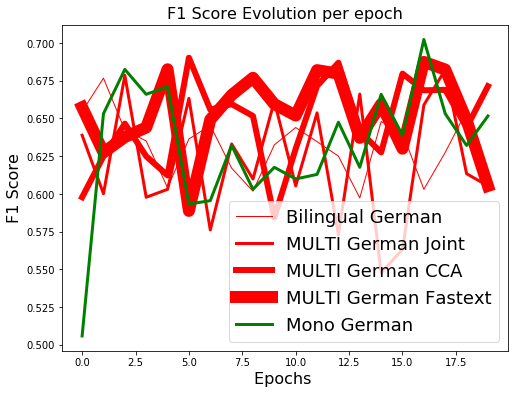

In [82]:
plt.figure(figsize=[8,6])
plt.plot(f1_cnn_multi_bil_de,'r',linewidth=1.0)
plt.plot(f1_cnn_multi_joint_de,'r',linewidth=3.0)
plt.plot(f1_cnn_multi_CCA_de,'r',linewidth=6.0)
plt.plot(f1_cnn_multi_fastext_de,'r',linewidth=12.0)
plt.plot(f1_cnn_mono_de,'g',linewidth=3.0)
plt.legend(['Bilingual German', 'MULTI German Joint', 'MULTI German CCA', 'MULTI German Fastext' , 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'Accuracy Score Evolution per epoch')

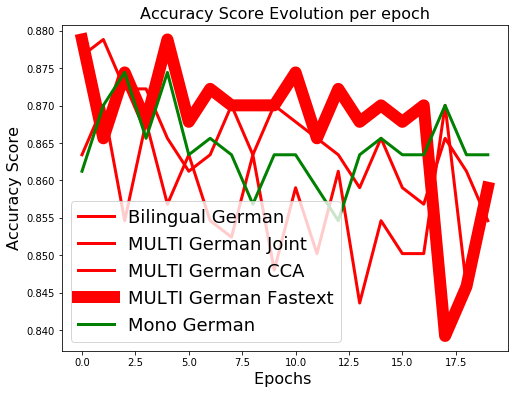

In [84]:
plt.figure(figsize=[8,6])
plt.plot(acc_cnn_multi_bil_de,'r',linewidth=3.0)
plt.plot(acc_cnn_multi_joint_de,'r',linewidth=3.0)
plt.plot(acc_cnn_multi_CCA_de,'r',linewidth=3.0)
plt.plot(acc_cnn_multi_fastext_de,'r',linewidth=12.0)
plt.plot(acc_cnn_mono_de,'g',linewidth=3.0)
plt.legend(['Bilingual German', 'MULTI German Joint', 'MULTI German CCA', 'MULTI German Fastext' , 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Accuracy Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

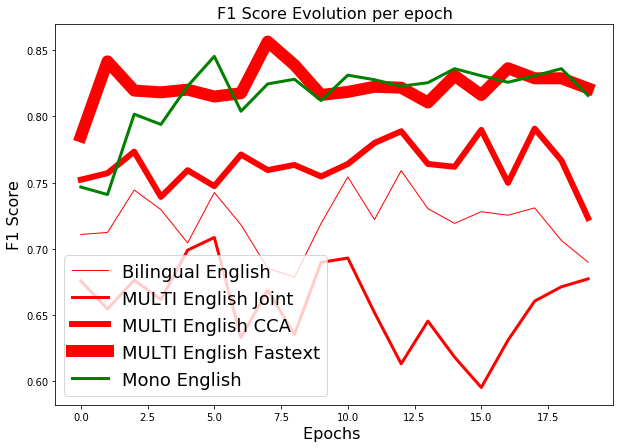

In [83]:
plt.figure(figsize=[10,7])
plt.plot(f1_cnn_multi_bil_en,'r',linewidth=1.0)
plt.plot(f1_cnn_multi_joint_en,'r',linewidth=3.0)
plt.plot(f1_cnn_multi_CCA_en,'r',linewidth=6.0)
plt.plot(f1_cnn_multi_fastext_en,'r',linewidth=12.0)
plt.plot(f1_cnn_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'MULTI English Fastext' , 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'Accuracy Score Evolution per epoch')

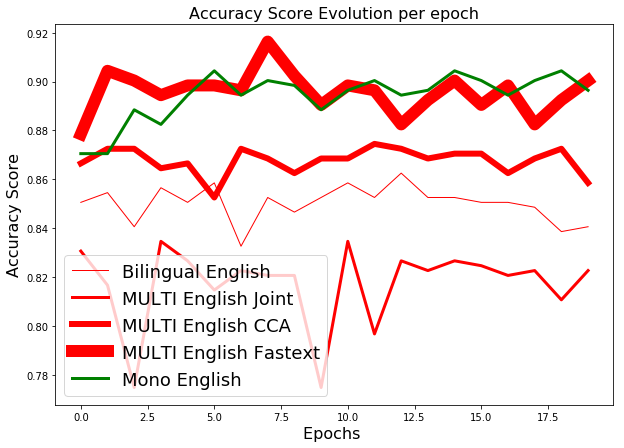

In [85]:
plt.figure(figsize=[10,7])
plt.plot(acc_cnn_multi_bil_en,'r',linewidth=1.0)
plt.plot(acc_cnn_multi_joint_en,'r',linewidth=3.0)
plt.plot(acc_cnn_multi_CCA_en,'r',linewidth=6.0)
plt.plot(acc_cnn_multi_fastext_en,'r',linewidth=12.0)
plt.plot(acc_cnn_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'MULTI English Fastext' , 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Accuracy Score Evolution per epoch',fontsize=16)

In [118]:
dir_results_parent = results_dir + "CNN_KerasModels_CHURN/"
models_dir = ["english_fastext_mono_results.p", 
              "german_fastext_mono_results.p",
              "en,de_fasttext_en_de_fr_it.vec_results.p",
              "en,de_expert_dict_dim_red_de_en.txt_results.p",
              "en,de_multiCCA_512_normalized_results.p",
              "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p",
              "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p",
              "en,de_multiSkip_512_normalized_results.p"]

epoch = 0
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            #f1_macro = round(results_dict['test_metrics_' + lang][epoch]["f1_macro"]*100,2)
            precision_macro = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)

            recall_macro = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
            f1_macro = round(harm_mean_2(precision_macro, recall_macro),2)
        else:
            f1_macro, precision_macro, recall_macro = '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*[ 'Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1           77.42        -         79.31       70.1      76.76   
   Macro Precision    85.84        -         83.51      81.95      82.52   
   Macro Recall        70.5        -         75.51      61.25      71.76   
DE Macro f1               -    59.05         69.03      62.65      64.45   
   Macro Precision        -     68.3         77.32      76.75      72.97   
   Macro Recall           -     52.0         62.34      52.92      57.71   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1             73.37           69.45       78.22  
   Macro Precision       80.0           74.55       86.33  
   Macro Recall         67.76           65.01        71.5  
DE Macro f1             68.46           65.57       67.25  
   Macro Precision       76.1           70.29       72.79  
   Macro Recall         62.21           61.45        62.5

In [114]:
dir_results_parent = results_dir + "CNN_KerasModels_CHURN/"

models_dir = ["english_fastext_mono_results.p", 
              "german_fastext_mono_results.p",
              "en,de_fasttext_en_de_fr_it.vec_results.p",
              "en,de_expert_dict_dim_red_de_en.txt_results.p",
              "en,de_multiCCA_512_normalized_results.p",
              "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p",
              "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p",
              "en,de_multiSkip_512_normalized_results.p"]


epochs = range(20)
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
f1_mono_en_mono = []
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            precision_macro_list = []
            recall_macro_list = []
            f1_macro_list = []
            for epoch in epochs:
                prec = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)
                rec = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
                precision_macro_list.append(prec)
                recall_macro_list.append(rec)
                f1_macro_list.append(round(harm_mean_2(prec, rec),2))
            ind = f1_macro_list.index(max(f1_macro_list))
            f1_macro = f1_macro_list[ind]
            recall_macro = recall_macro_list[ind]
            precision_macro = precision_macro_list[ind]

        else:
            f1_macro, precision_macro, recall_macro =  '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

#print(table_values_arr)

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*['Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
#df.T
#df
#print("ENGLISH:")
#print(df["EN+DE(multi_CCA)"]["EN"]["Macro f1"], df["EN+DE(multi_CCA)"]["EN"]["Macro Precision"], df["EN+DE(multi_CCA)"]["EN"]["Macro Recall"])
#print("GERMAN")
#print(df["EN+DE(multi_CCA)"]["DE"]["Macro f1"], df["EN+DE(multi_CCA)"]["DE"]["Macro Precision"], df["EN+DE(multi_CCA)"]["DE"]["Macro Recall"])
#print("------------------------------")
#f1_mono.append(df["DE(mono)"]["DE"]["Macro f1"])
#print("f1 score:", df["EN(mono)"]["EN"]["Macro f1"])
#print("precision:", df["EN(mono)"]["EN"]["Macro Precision"])
#print("recall:", df["EN(mono)"]["EN"]["Macro Recall"])
df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1            84.6        -         86.15      83.97      79.09   
   Macro Precision    85.72        -         89.82      82.58      79.54   
   Macro Recall       83.51        -         82.76       85.4      78.64   
DE Macro f1               -    70.29         70.02      73.37      69.74   
   Macro Precision        -    71.16         75.88      79.23      73.16   
   Macro Recall           -    69.44          65.0      68.31      66.62   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1             76.56           70.86        85.5  
   Macro Precision      80.02           70.94       88.71  
   Macro Recall         73.39           70.78       82.51  
DE Macro f1             69.75           69.01       69.25  
   Macro Precision      76.16           72.53       76.86  
   Macro Recall         64.34           65.82       63.01

## 3. Analysis of GRU-ATT Results:

In [43]:
print("Loading multilingual results ...")
dir_ = "GRU-ATT_KerasModels_CHURN/"

print("Loading multilingual semantic specialization ...")
with open(results_dir + dir_+ "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p", "rb") as file:
    results_multi_gru_bil = cPickle.load(file, encoding="latin1")

print("Loading multilingual joint embeddings ...")
with open(results_dir + dir_ + "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p", "rb") as file:
    results_multi_gru_joint = cPickle.load(file, encoding="latin1")
    
print("Loading multilingual joint embeddings ...")
with open(results_dir + dir_ + "en,de_multiCCA_512_normalized_results.p", "rb") as file:
    results_multi_gru_multi_CCA = cPickle.load(file, encoding="latin1")

print("Loading english monolingual ...")
with open(results_dir + dir_ + "english_mono_results.p", "rb") as file:
    results_en_mono_gru = cPickle.load(file, encoding="latin1")

print("Loading german monolingual ...")   
with open(results_dir + dir_ + "german_mono_results.p", "rb") as file:
    results_de_mono_gru = cPickle.load(file, encoding="latin1")

Loading multilingual results ...
Loading multilingual semantic specialization ...
Loading multilingual joint embeddings ...
Loading multilingual joint embeddings ...
Loading english monolingual ...
Loading german monolingual ...


In [44]:
f1_gru_multi_bil_en = []
f1_gru_multi_bil_de = []

f1_gru_multi_joint_en = []
f1_gru_multi_joint_de = []

f1_gru_multi_CCA_en = []
f1_gru_multi_CCA_de = []

f1_gru_mono_en = []
f1_gru_mono_de = []

acc_gru_multi_bil_en = []
acc_gru_multi_bil_de = []

acc_gru_multi_joint_en = []
acc_gru_multi_joint_de = []

acc_gru_multi_CCA_en = []
acc_gru_multi_CCA_de = []

acc_gru_mono_en = []
acc_gru_mono_de = []

for i in range(0,20):
    f1_gru_multi_bil_en.append(results_multi_gru_bil["test_metrics_en"][i]["f1_macro"])
    f1_gru_multi_bil_de.append(results_multi_gru_bil["test_metrics_de"][i]["f1_macro"])
    
    f1_gru_multi_joint_en.append(results_multi_gru_joint["test_metrics_en"][i]["f1_macro"])
    f1_gru_multi_joint_de.append(results_multi_gru_joint["test_metrics_de"][i]["f1_macro"])

    f1_gru_multi_CCA_en.append(results_multi_gru_multi_CCA["test_metrics_en"][i]["f1_macro"])
    f1_gru_multi_CCA_de.append(results_multi_gru_multi_CCA["test_metrics_de"][i]["f1_macro"])
    
    f1_gru_mono_en.append(results_en_mono_gru["test_metrics_en"][i]["f1_macro"])
    f1_gru_mono_de.append(results_de_mono_gru["test_metrics_de"][i]["f1_macro"])
    #######
    acc_gru_multi_bil_en.append(results_multi_gru_bil["test_metrics_en"][i]["acc"])
    acc_gru_multi_bil_de.append(results_multi_gru_bil["test_metrics_de"][i]["acc"])
    
    acc_gru_multi_joint_en.append(results_multi_gru_joint["test_metrics_en"][i]["acc"])
    acc_gru_multi_joint_de.append(results_multi_gru_joint["test_metrics_de"][i]["acc"])

    acc_gru_multi_CCA_en.append(results_multi_gru_multi_CCA["test_metrics_en"][i]["acc"])
    acc_gru_multi_CCA_de.append(results_multi_gru_multi_CCA["test_metrics_de"][i]["acc"])
    
    acc_gru_mono_en.append(results_en_mono_gru["test_metrics_en"][i]["acc"])
    acc_gru_mono_de.append(results_de_mono_gru["test_metrics_de"][i]["acc"])

Text(0.5,1,'F1 Score Evolution per epoch')

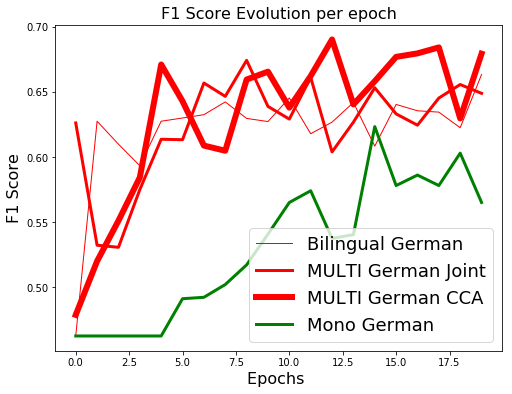

In [45]:
plt.figure(figsize=[8,6])
plt.plot(f1_gru_multi_bil_de,'r',linewidth=1.0)
plt.plot(f1_gru_multi_joint_de,'r',linewidth=3.0)
plt.plot(f1_gru_multi_CCA_de,'r',linewidth=6.0)
plt.plot(f1_gru_mono_de,'g',linewidth=3.0)
plt.legend(['Bilingual German', 'MULTI German Joint', 'MULTI German CCA', 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'Accuracy Score Evolution per epoch')

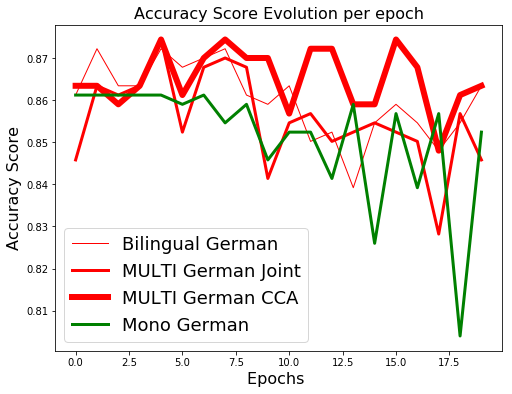

In [46]:
plt.figure(figsize=[8,6])
plt.plot(acc_gru_multi_bil_de,'r',linewidth=1.0)
plt.plot(acc_gru_multi_joint_de,'r',linewidth=3.0)
plt.plot(acc_gru_multi_CCA_de,'r',linewidth=6.0)
plt.plot(acc_gru_mono_de,'g',linewidth=3.0)
plt.legend(['Bilingual German', 'MULTI German Joint', 'MULTI German CCA', 'Mono German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Accuracy Score Evolution per epoch',fontsize=16)

Text(0.5,1,'F1 Score Evolution per epoch')

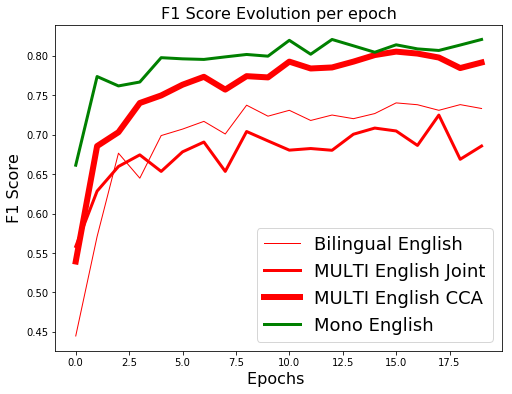

In [47]:
plt.figure(figsize=[8,6])
plt.plot(f1_gru_multi_bil_en,'r',linewidth=1.0)
plt.plot(f1_gru_multi_joint_en,'r',linewidth=3.0)
plt.plot(f1_gru_multi_CCA_en,'r',linewidth=6.0)
plt.plot(f1_gru_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('F1 Score',fontsize=16)
plt.title('F1 Score Evolution per epoch',fontsize=16)

Text(0.5,1,'Accuracy Score Evolution per epoch')

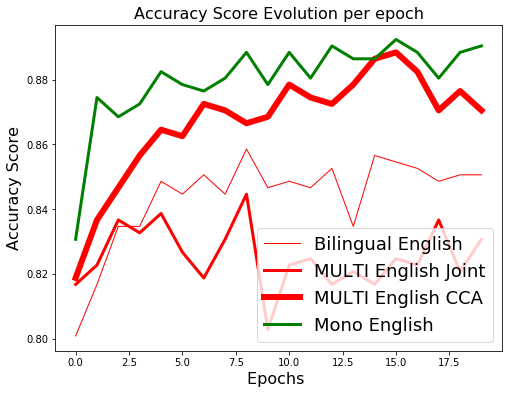

In [48]:
plt.figure(figsize=[8,6])
plt.plot(acc_gru_multi_bil_en,'r',linewidth=1.0)
plt.plot(acc_gru_multi_joint_en,'r',linewidth=3.0)
plt.plot(acc_gru_multi_CCA_en,'r',linewidth=6.0)
plt.plot(acc_gru_mono_en,'g',linewidth=3.0)
plt.legend(['Bilingual English', 'MULTI English Joint', 'MULTI English CCA', 'Mono English'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title('Accuracy Score Evolution per epoch',fontsize=16)

In [3]:
def harm_mean_2(precision, recall):
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [13]:
def recall_2(precision, f1):
    recall = (precision * f1) / (2*precision - f1)
    return recall

In [131]:
dir_results_parent = results_dir + "GRU-ATT_KerasModels_CHURN/"
models_dir = ["english_mono_results.p", 
              "german_mono_results.p",
              "en,de_fasttext_en_de_fr_it.vec_results.p",
              "en,de_expert_dict_dim_red_de_en.txt_results.p",
              "en,de_multiCCA_512_normalized_results.p",
              "en,de_semantic_spec_mrksic_2017-en_de_it_ru-ende-lang-joint-1e-09_results.p",
              "en,de_joint_emb_ferreira_2016_reg-l1_mu-1e-9_epochs-50_results.p",
              "en,de_multiSkip_512_normalized_results.p"]

epoch = 6
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            #f1_macro = round(results_dict['test_metrics_' + lang][epoch]["f1_macro"]*100,2)
            precision_macro = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)

            recall_macro = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
            f1_macro = round(harm_mean_2(precision_macro, recall_macro),2)
        else:
            f1_macro, precision_macro, recall_macro = '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*[ 'Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)
df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1           79.71        -         76.87      65.82       78.2   
   Macro Precision    81.48        -         77.73      76.73      82.42   
   Macro Recall       78.01        -         76.02      57.63      74.39   
DE Macro f1               -    58.58         69.87      46.27      65.39   
   Macro Precision        -    68.22         74.81      43.06      74.12   
   Macro Recall           -    51.33         65.54       50.0       58.5   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1             73.53           69.39       66.43  
   Macro Precision      79.34           71.23       90.44  
   Macro Recall         68.51           67.65        52.5  
DE Macro f1             66.26           67.17       60.63  
   Macro Precision      73.24           71.89       67.24  
   Macro Recall          60.5           63.03        55.2

In [128]:
epochs = range(20)
metrics_list = []
all_lang = ["en", "de"]
lang_dict = {"english": "en", "german": "de"}
f1_mono_en_mono = []
table_whole = []
for i in range(0, len(models_dir)):
    table_values = []
    with open(dir_results_parent+models_dir[i], "rb") as file:
        results_dict = cPickle.load(file, encoding="latin1")
    if "mono" in models_dir[i]:
        test_lang = [lang_dict[models_dir[i].split("_")[0]]]
    else:
        test_lang = all_lang
    for lang in all_lang:
        if lang in test_lang:
            precision_macro_list = []
            recall_macro_list = []
            f1_macro_list = []
            for epoch in epochs:
                prec = round(results_dict['test_metrics_' + lang][epoch]["precision_macro"]*100,2)
                rec = round(results_dict['test_metrics_' + lang][epoch]["recall_macro"]*100,2)
                precision_macro_list.append(prec)
                recall_macro_list.append(rec)
                f1_macro_list.append(round(harm_mean_2(prec, rec),2))
            ind = f1_macro_list.index(max(f1_macro_list))
            f1_macro = f1_macro_list[ind]
            recall_macro = recall_macro_list[ind]
            precision_macro = precision_macro_list[ind]

        else:
            f1_macro, precision_macro, recall_macro =  '-', '-', '-'
        table_values.append(f1_macro)
        table_values.append(precision_macro)
        table_values.append(recall_macro)
    table_whole.append(table_values)
table_values_arr = np.transpose(np.array(table_whole))

tuples = list(zip(*[['EN', 'EN', 'EN',
                     'DE', 'DE', 'DE'],
                    4*['Macro f1', 'Macro Precision', 'Macro Recall']]))

column_names = [ 'EN(mono)', 'DE(mono)', 'multi(pseudo)', 'multi(exp)', 'multi(CCA)', 'multi(sem)', 'multi(sent_ali)', "multi(skip)"  ] 

index = pd.MultiIndex.from_tuples(tuples)

df = pd.DataFrame(table_values_arr, index=index, columns=column_names)

df

EN(mono) DE(mono) multi(pseudo) multi(exp) multi(CCA)  \
EN Macro f1           84.45        -         78.69      78.28      81.18   
   Macro Precision    87.75        -         81.27      82.15      85.08   
   Macro Recall       81.38        -         76.26      74.76      77.63   
DE Macro f1               -    69.45         69.87      70.25      69.74   
   Macro Precision        -    74.02         74.81      77.18      73.16   
   Macro Recall           -    65.41         65.54      64.47      66.62   

                   multi(sem) multi(sent_ali) multi(skip)  
EN Macro f1             75.24           72.74       76.49  
   Macro Precision      80.65           74.54       81.56  
   Macro Recall         70.51           71.02       72.01  
DE Macro f1             67.17           68.28       67.95  
   Macro Precision      70.53           71.87       72.63  
   Macro Recall         64.11           65.03       63.83

Text(0.5,1,'Precision-Recall Tradeoff')

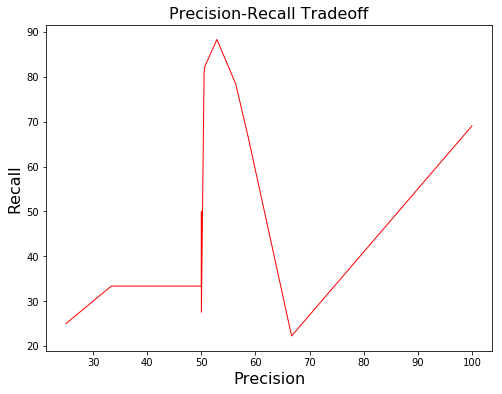

In [145]:
plt.figure(figsize=[8,6])
#[82.08,50,60.6,71.29,58.95,50,66.67,50,63.08]
#[32.26,12.5,44.81,46.66,37.63,16.67,12.96,9.17,49.45]
x = [58.66,25,50.5,50.64,33.33,56.35,50,50,66.67,100,50,52.87]
y = [66.49,25,80.88,82.33,33.33,78.39,33.34,50,22.22,69.05,27.5,88.32]
x2,y2 = zip(*sorted(zip(x,y),key=lambda x: x[0]))
plt.plot(x2, y2,'r',linewidth=1.0)
plt.xlabel('Precision',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.title('Precision-Recall Tradeoff',fontsize=16)